# FRIENDS CLASSIFICATION

In [1]:
import wget
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
config =tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)
import pickle
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import sys
import PIL
from PIL import Image
from glob import glob
from keras.models import Sequential
from keras.layers import Input,Lambda,Dense,Flatten
from keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from keras import regularizers
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
sys.modules['Image'] = Image


DATADIR =r"C:\Users\CHINMAY\Desktop\hackerearth\Dataset\DATASETS\Train data"
VALDIR=r"C:\Users\CHINMAY\Desktop\validation_dir"


Using TensorFlow backend.


# MODEL CREATION

In [2]:
IMG_SIZE=50

model = tf.keras.models.Sequential([
    # 1st CONVOLUTIONAL LAYER
    
    tf.keras.layers.Conv2D((16),(3,3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3),padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # 2nd CONVOLUTIONAL LAYER
    
    tf.keras.layers.Conv2D((32),(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # 3rd CONVOLUTIONAL LAYER
    
    tf.keras.layers.Conv2D((64),(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    # DEEP NEURAL NETWORK
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense((512),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense((256),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense((128),activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3,activation='softmax')
])


model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])




train_datagen=ImageDataGenerator(rescale = 1./255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
train_generator = train_datagen.flow_from_directory(DATADIR,
                         target_size=(50,50),
                         batch_size=64,
                         class_mode='sparse')


val_datagen=ImageDataGenerator(rescale=1./255)
val_generator = val_datagen.flow_from_directory(
                   VALDIR,
                   target_size=(50,50),
                   batch_size=64,
                   class_mode='sparse')



Found 810 images belonging to 3 classes.
Found 104 images belonging to 3 classes.


# TRAINING

In [3]:
history= model.fit_generator(train_generator,epochs=20,validation_data=val_generator)

Epoch 1/20
13/13 [==============================] - 3s 256ms/step - loss: 1.1474 - accuracy: 0.3901 - val_loss: 1.1683 - val_accuracy: 0.3365
Epoch 2/20
13/13 [==============================] - 2s 165ms/step - loss: 1.0144 - accuracy: 0.4877 - val_loss: 1.1631 - val_accuracy: 0.3365
Epoch 3/20
13/13 [==============================] - 2s 166ms/step - loss: 0.9538 - accuracy: 0.5395 - val_loss: 1.1001 - val_accuracy: 0.2981
Epoch 4/20
13/13 [==============================] - 2s 180ms/step - loss: 0.9326 - accuracy: 0.5543 - val_loss: 1.1131 - val_accuracy: 0.3558
Epoch 5/20
13/13 [==============================] - 2s 169ms/step - loss: 0.8891 - accuracy: 0.5580 - val_loss: 1.0891 - val_accuracy: 0.4038
Epoch 6/20
13/13 [==============================] - 2s 175ms/step - loss: 0.8790 - accuracy: 0.5926 - val_loss: 1.1153 - val_accuracy: 0.3654
Epoch 7/20
13/13 [==============================] - 2s 164ms/step - loss: 0.8688 - accuracy: 0.5889 - val_loss: 1.1071 - val_accuracy: 0.3365
Epoch 

# PLOTTING

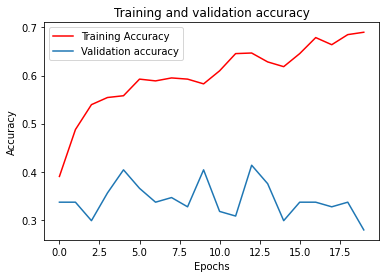

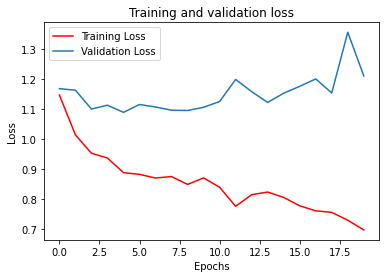

In [7]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot  ( epochs,     acc ,'r', label= 'Training Accuracy')
plt.plot  ( epochs, val_acc, label='Validation accuracy' )
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot  ( epochs,     loss ,'r', label= 'Training Loss' )
plt.plot  ( epochs, val_loss , label= 'Validation Loss')
plt.title ('Training and validation loss'   )
plt.legend()

# PREDICTION

In [6]:
model.save=("fr.h5")


results={
   0:'adults',
   1:'teen',
   2:'toddlers',
   
}


from PIL import Image
import numpy as np
im=Image.open(r"C:\Users\CHINMAY\Desktop\hackerearth\Dataset\DATASETS\Train data\adults\2Q__ (12).jpg")
# the input image is required to be in the shape of dataset, i.e (32,32,3)
#im = tf.cast(im, tf.float32)
im=im.resize((50,50))
im=np.expand_dims(im,axis=0)
im=np.array(im)
im= tf.convert_to_tensor(im,dtype=tf.float16)
pred=model.predict_classes([im])[0]
print(pred,results[pred])



2 toddlers
